<h1>premier k-NN : Application _ Test De Personnalité</h1>

## Partie 1 : Base de données, Analyse, Prétraitement et Préparation

### Test De personnalité

Fusionner les fichiers réponses

In [1]:
#%run data.py

Importer les bibliothèques

In [1]:
import pandas as pd
import numpy as np

Importer la dataset

In [2]:
path='./DataSet/combined_csv.csv'
df = pd.read_csv(path)
df.head(50)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
5,c,b,a,c,b,2,3,1,3,2,10,B
6,g,z,ju,d,u,4,7,2,3,1,3,C
7,j,f,d,t,u,2,6,3,1,3,5,C
8,a,d,c,b,a,2,3,7,1,3,9,C
9,a,b,c,e,d,2,3,2,1,3,8,C


In [3]:
df.shape

(205, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              197 non-null    object
 1   Q2              193 non-null    object
 2   Q3              192 non-null    object
 3   Q4              196 non-null    object
 4   Q5              191 non-null    object
 5   Q6              193 non-null    object
 6   Q7              197 non-null    object
 7   Q8              195 non-null    object
 8   Q9              197 non-null    object
 9   Q10             198 non-null    object
 10  Score           205 non-null    int64 
 11  Interpretation  205 non-null    object
dtypes: int64(1), object(11)
memory usage: 19.3+ KB


In [5]:
listena = df.columns[df.isnull().any()]
listena

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], dtype='object')

In [6]:
list_abc = ['Q1', 'Q2', 'Q3', 'Q4']
list_ab = ['Q5']
list_123 = ['Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [7]:
#pour transformer toutes les autres valeurs que a, b ou c en NaN :
df[list_abc] = df[list_abc][df.isin(["a","b","c"])]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
200,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
201,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
202,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
203,a,NaN,NaN,a,b,v,t,Y,',1,3,C


In [8]:
#pour transformer toutes les autres valeurs que a, b ou c en NaN :
df[list_ab] = df[list_ab][df.isin(["a","b"])]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,NaN,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
200,c,c,NaN,c,NaN,NaN,NaN,3.0,3,3,14,B
201,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
202,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
203,a,NaN,NaN,a,b,v,t,Y,',1,3,C


In [9]:
#pour transformer toutes les autres valeurs que a, b ou c en NaN :
df[list_123] = df[list_123][df.isin(["1","2","3","1.0","2.0","3.0"])]
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,NaN,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
200,c,c,NaN,c,NaN,NaN,NaN,3.0,3,3,14,B
201,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
202,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
203,a,NaN,NaN,a,b,NaN,NaN,NaN,NaN,1,3,C


In [11]:
#pour transformer toutes les autres valeurs en NaN :
#dfX = dfX[dfX.isin([0,1,2])]
#dfX.head(30), dfX.shape

In [10]:
# remplacer les valeurs a,b,c,1,2,3,1.0,2.0,3.0, avec  :
df[listena]= df[listena].replace(["a","1","1.0"],1).replace(["b","2","2.0"],0).replace(["c","3","3.0"],2,)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,B
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,C
2,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,20,A
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,8,C
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0,2.0,14,B
201,0.0,1.0,2.0,NaN,0.0,NaN,0.0,NaN,2.0,0.0,5,C
202,1.0,2.0,0.0,NaN,NaN,1.0,NaN,2.0,0.0,2.0,8,C
203,1.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,3,C


In [11]:
# je travaille sur ma data X : 
X =df.drop(["Score","Interpretation"], axis = 1)
median = X.median()
X.fillna(median, inplace=True)
X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
200,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
201,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0
202,1.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
203,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [12]:
#dfX["Score","Interpretation"] = df["Score","Interpretation"]
y = df[["Interpretation"]].copy()
y

,Interpretation
0,B
1,C
2,A
3,C
4,B
...,...
200,B
201,C
202,C
203,C


In [15]:
#Solution abandonnée:
# je supprime les lignes avec NaN
#dfX.dropna(axis=0, inplace=True)
#dfX.shape

In [13]:
X = X.astype(float)
X.info()
X

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      205 non-null    float64
 1   Q2      205 non-null    float64
 2   Q3      205 non-null    float64
 3   Q4      205 non-null    float64
 4   Q5      205 non-null    float64
 5   Q6      205 non-null    float64
 6   Q7      205 non-null    float64
 7   Q8      205 non-null    float64
 8   Q9      205 non-null    float64
 9   Q10     205 non-null    float64
dtypes: float64(10)
memory usage: 16.1 KB


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
3,1.0,0.0,2.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0
4,0.0,2.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
200,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
201,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0
202,1.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
203,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


## Partie 2 : Développement et entraînement d’un modèle KNN

### KNN From Scratch

#### Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).
    Codez l’algorithme de KNN sous forme une fonction (def KNN(Data_Test, Data_Train, Label_Train, k=1, **kargs)) qui :
- Calcul la distance entre Data de test et Data d’apprentissage.
- Trouve la/les distances plus proche de « k » voisins.
- Classe Data de test selon la classe majoritaire de « k » voisins.
- Retourne la classe de Data Test.
- Réalisez des expérimentations en variant la distance et le nombre de « k ».
- Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. (Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 1er calcul de distance

In [15]:
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis

In [16]:
k = 2
metric = 'manhattan'

def knn(X_test, X_train, y_train, k, metric) :


    Resultat = []
    for j in range(0,len(X_test)):

        D_T = X_test.iloc[j,:]

        Distance = []
        for i in range(0,len(X_train)):
            D_A = X_train.iloc[i,:]

            #Dis = np.sqrt(np.sum((D_T-D_A)**2))

            Dis = distance(D_T, D_A, metric)
            Distance.append(Dis)

        SS = np.sort(Distance)
        S = np.argsort(Distance)

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]

        Pred = [np.sum((Pred == 'A').astype(int)), np.sum((Pred == 'B').astype(int)), np.sum((Pred == 'C').astype(int))]

        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'

        Resultat.append(P)

    return Resultat

knn(X_test, X_train, y_train, k, "euclidean")



['B',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'B',
 'C',
 'B',
 'C',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'B',
 'C',
 'C',
 'B',
 'B',
 'C',
 'B',
 'B',
 'C',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C']

## calcul de distance avec p

In [17]:
def distance_univ(Data_1, Data_2, p):
    Dis2 = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis2

In [18]:
k = 2
p = 5

def knn2(X_test, X_train, y_train, k, p) :


    Resultat = []
    for j in range(0,len(X_test)):

        D_T = X_test.iloc[j,:]

        Distance = []
        for i in range(0,len(X_train)):
            D_A = X_train.iloc[i,:]

            #Dis = np.sqrt(np.sum((D_T-D_A)**2))

            Dis2 = distance_univ(D_T, D_A, p)
            Distance.append(Dis2)

        SS = np.sort(Distance)
        S = np.argsort(Distance)

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]

        Pred = [np.sum((Pred == 'A').astype(int)), np.sum((Pred == 'B').astype(int)), np.sum((Pred == 'C').astype(int))]

        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'

        Resultat.append(P)

    return Resultat

knn2(X_test, X_train, y_train, k, p)

['B',
 'C',
 'C',
 'C',
 'C',
 'B',
 'C',
 'C',
 'C',
 'B',
 'C',
 'B',
 'C',
 'B',
 'C',
 'B',
 'C',
 'B',
 'C',
 'B',
 'A',
 'B',
 'B',
 'B',
 'C',
 'C',
 'B',
 'C',
 'C',
 'B',
 'B',
 'C',
 'B',
 'B',
 'C',
 'B',
 'B',
 'C',
 'C',
 'C',
 'C']

### Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. 
(Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).

In [19]:
y_test

,Interpretation
21,C
45,C
85,C
199,C
28,C
72,B
86,B
109,C
71,C
18,C


In [24]:
#creation d'une liste pour afficher la courbe des variations de K
accuracies = []

for k in range (1, 20):
    
    y_predict = knn(X_test, X_train, y_train, k, "euclidean")
    # Caluler l'accuracy sans la matrice de confusion
    Acc = np.sum((y_predict == np.array(y_test)).astype(int))/len(y_test)
    accuracies.append(Acc)
    
print(accuracies)

[22.365853658536587, 20.829268292682926, 23.024390243902438, 22.365853658536587, 23.902439024390244, 22.365853658536587, 23.682926829268293, 23.24390243902439, 23.902439024390244, 23.463414634146343, 24.341463414634145, 24.121951219512194, 24.5609756097561, 24.121951219512194, 24.5609756097561, 24.341463414634145, 24.341463414634145, 24.341463414634145, 24.341463414634145]


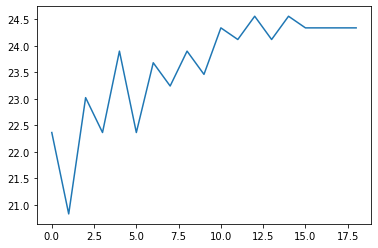

In [25]:
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(range(1,20), accuracies)
#ax.set_xlabel('Nombre de voisins (k)')
#ax.set_ylabel('Précision (%)')

plt.plot(accuracies)

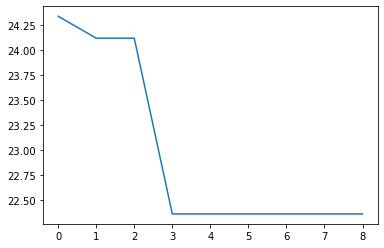

In [26]:
accuracies2 = []

for k in range (1, 10):
    
    y_predict = knn(X_test, X_train, y_train, k, "manhattan")
    # Caluler l'accuracy sans la matrice de confusion
    Acc = np.sum((y_predict == np.array(y_test)).astype(int))/len(y_test)
    accuracies2.append(Acc)
    
plt.plot(accuracies2)

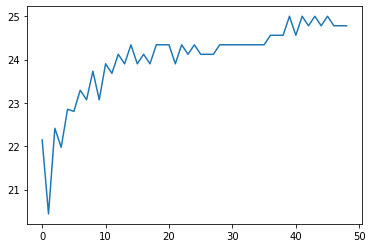

In [33]:
accuracies3 = []

for k in range (1, 50):
    
    y_predict = knn2(X_test, X_train, y_train, k, 6)
    # Caluler l'accuracy sans la matrice de confusion
    Acc = np.sum((y_predict == np.array(y_test)).astype(int))/len(y_test)
    accuracies3.append(Acc)
    
plt.plot(accuracies3)

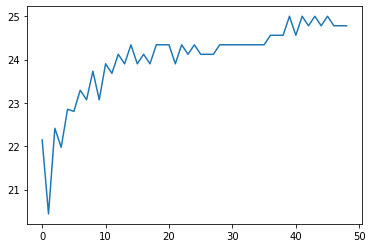

In [34]:
accuracies4 = []

for k in range (1, 50):
    
    y_predict = knn2(X_test, X_train, y_train, k, 3)
    # Caluler l'accuracy sans la matrice de confusion
    Acc = np.sum((y_predict == np.array(y_test)).astype(int))/len(y_test)
    accuracies4.append(Acc)
    
plt.plot(accuracies4)

## KNN Sklearn

La bibliothèque Sklearn propose un panel des techniques de classification, y compris le KNN.

Dans cette étape, vous êtes orientés vers la classe « sklearn.neighbors » pour maitriser les paramètres et les options possibles.

Vous êtes censés à préparer un modèle performant pour notre application tout en respectant les consignes de la conception d’un modèle IA (Data préparée, K-fold validation, hyperparamètre, Gridsearch). (N’oubliez pas de présenter une comparaison entre KNN From Scratch et KNN Sklearn dans le compte rendu).


In [35]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

kf = KFold(n_splits = 3)
kf.get_n_splits(X)

X = np.array(X)

for train_index, test_index in kf.split(X):
    X_train= X[train_index,:]
    y_train= y.iloc[train_index]
    
    X_test= X[test_index,:]
    y_test= y.iloc[test_index]
    
    model = KNN(n_neighbors=9)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Précision du modèle (accuracy_score) : ', accuracy_score(y_test, y_pred))
    print('\nMatrice de confusion (confusion_matrix) : \n', confusion_matrix(y_test, y_pred))
    print('\nReport (classification report) : \n', classification_report(y_test, y_pred))
    print('=========================================================================================== \n')
    

Précision du modèle (accuracy_score) :  0.7971014492753623

Matrice de confusion (confusion_matrix) : 
 [[ 0  1  0]
 [ 0  6 11]
 [ 0  2 49]]

Report (classification report) : 
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.67      0.35      0.46        17
           C       0.82      0.96      0.88        51

    accuracy                           0.80        69
   macro avg       0.49      0.44      0.45        69
weighted avg       0.77      0.80      0.77        69


Précision du modèle (accuracy_score) :  0.7205882352941176

Matrice de confusion (confusion_matrix) : 
 [[ 0  1  0]
 [ 1 10 17]
 [ 0  0 39]]

Report (classification report) : 
               precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           B       0.91      0.36      0.51        28
           C       0.70      1.00      0.82        39

    accuracy                           0.72   

<ipython-input-35-6c80cdbab0ee>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-35-6c80cdbab0ee>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-35-6c80cdbab0ee>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\util

## Grid Search/pipeline
pipeline pour trouver le meilleur classifier

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
params = { 'n_neighbors' : np.arange(1,30), 'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNN(), params, cv=2)

gs.fit(X_train, y_train)


#meilleurs params
gs.best_params_

# puis recréer un knn avec ces best_parametres 

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWa

{'metric': 'minkowski', 'n_neighbors': 17}

## Création modèle avec les bons paramètres

In [41]:
clf_def = KNN(n_neighbors=4, p=3)

In [42]:
clf_def.fit(X_test, y_test)

<ipython-input-42-de737e8c6c58>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf_def.fit(X_test, y_test)


KNeighborsClassifier(n_neighbors=4, p=3)

In [43]:
clf_def.score(X_test, y_test)

0.7794117647058824

# Partie 3 : Mettre en place la solution dans l’application de test de personnalité

- Utilisez la fonction « joblib » pour enregistrer votre modèle, une fois vous avez préparé votre meilleur modèle de classification Faites intégrer cette solution à l’Application

- Test de Personnalité et adapter l’application pour comparer le résultat avec et sans IA.

In [44]:
import joblib

In [46]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(model, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.5
